[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


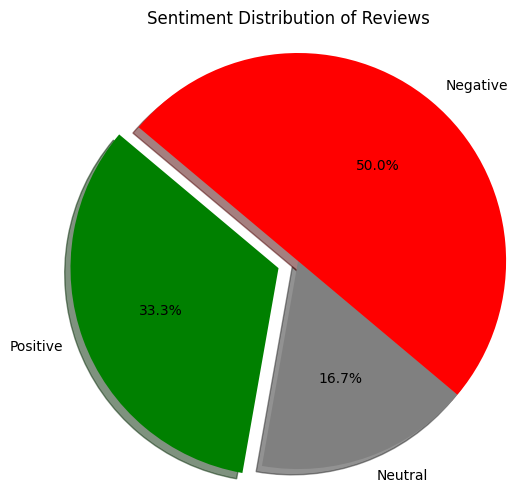

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon if not already done
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample list of reviews (can be replaced with file input)
reviews = [
    "The product quality is amazing, totally worth it!",
    "I am not happy with this item. It broke in a week.",
    "It's okay, not bad but not great either.",
    "Fantastic experience, delivery was quick and item was as described!",
    "Terrible service, I will never buy from here again.",
    "Neutral opinion. It works as expected, nothing more."
]

# Counters for sentiment categories
positive = 0
neutral = 0
negative = 0

# Analyze each review
for review in reviews:
    scores = analyzer.polarity_scores(review)
    compound = scores['compound']

    if compound >= 0.05:
        positive += 1
    elif compound <= -0.05:
        negative += 1
    else:
        neutral += 1

# Data for pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive, neutral, negative]
colors = ['green', 'grey', 'red']
explode = (0.1, 0, 0)  # explode first slice

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, explode=explode)
plt.title("Sentiment Distribution of Reviews")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Total Reviews: 6
Positive: 3
Neutral : 1
Negative: 2


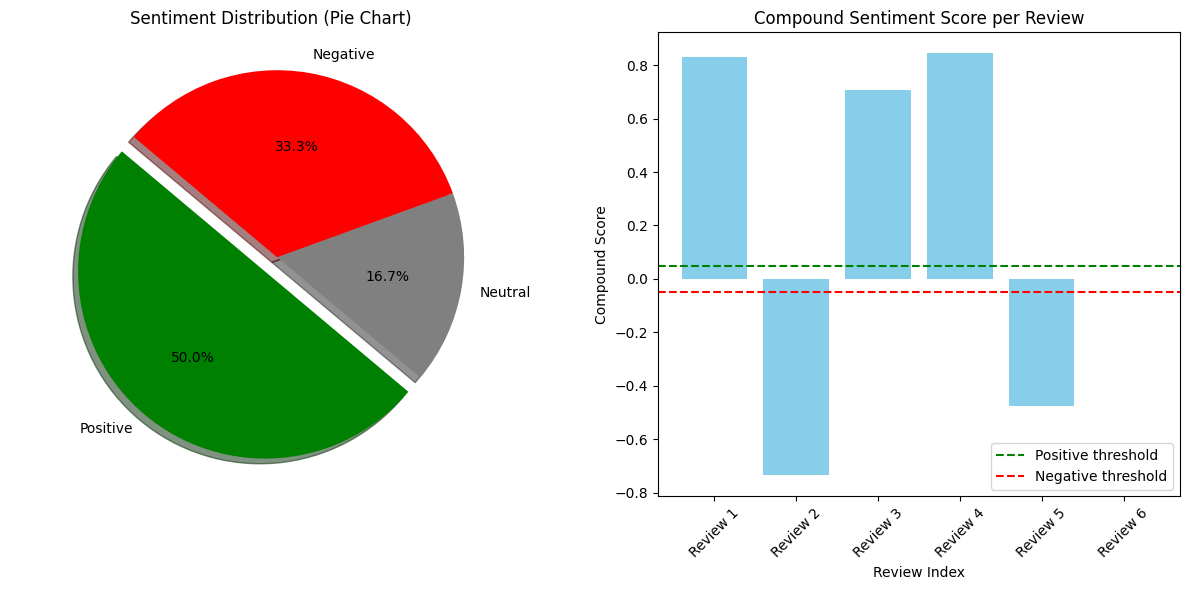

In [ ]:
# Step 1: Import necessary libraries
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Step 2: Download VADER lexicon (only needed once)
nltk.download('vader_lexicon')

# Step 3: Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 4: Sample dataset (You can replace this with CSV or user input)
reviews = [
    "The product is fantastic! I loved it and will buy again.",
    "Terrible experience. The item arrived broken and late.",
    "It was okay, not as expected but not the worst either.",
    "Excellent service, very fast delivery and great quality!",
    "Poor packaging. Item got scratched during shipping.",
    "Neutral feedback. It works, nothing exceptional."
]

# Step 5: Initialize counters for sentiment categories
positive = 0
neutral = 0
negative = 0

# Step 6: Collect sentiment scores for graphing
compound_scores = []

# Step 7: Analyze each review
for review in reviews:
    score = analyzer.polarity_scores(review)
    compound = score['compound']
    compound_scores.append(compound)

    if compound >= 0.05:
        positive += 1
    elif compound <= -0.05:
        negative += 1
    else:
        neutral += 1

# Step 8: Display text-based summary
print(f"\nTotal Reviews: {len(reviews)}")
print(f"Positive: {positive}")
print(f"Neutral : {neutral}")
print(f"Negative: {negative}")

# Step 9: Pie Chart for sentiment distribution
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive, neutral, negative]
colors = ['green', 'gray', 'red']
explode = (0.1, 0, 0)  # Highlight Positive slice

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, explode=explode)
plt.title("Sentiment Distribution (Pie Chart)")
plt.axis('equal')

# Step 10: Bar Chart of compound scores per review
plt.subplot(1, 2, 2)
plt.bar(range(len(reviews)), compound_scores, color='skyblue')
plt.axhline(0.05, color='green', linestyle='--', label='Positive threshold')
plt.axhline(-0.05, color='red', linestyle='--', label='Negative threshold')
plt.title("Compound Sentiment Score per Review")
plt.xlabel("Review Index")
plt.ylabel("Compound Score")
plt.xticks(range(len(reviews)), [f"Review {i+1}" for i in range(len(reviews))], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model Accuracy: 0.8025
Most Informative Features
   contains(outstanding) = True              pos : neg    =      9.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      8.0 : 1.0
        contains(seagal) = True              neg : pos    =      7.1 : 1.0
         contains(awful) = True              neg : pos    =      6.3 : 1.0
        contains(wasted) = True              neg : pos    =      5.8 : 1.0
          contains(lame) = True              neg : pos    =      5.7 : 1.0
        contains(poorly) = True              neg : pos    =      5.5 : 1.0
           contains(era) = True              pos : neg    =      5.2 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.2 : 1.0
         contains(badly) = True              neg : pos    =      4.7 : 1.0

Classification Report:
               precision    recall  f1-score   support

         neg       0.79      0.84      0.81       204
         pos       0.82      0.76      0.79       196

    accuracy

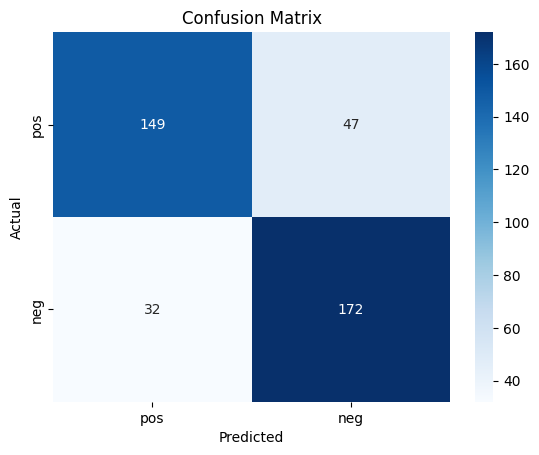

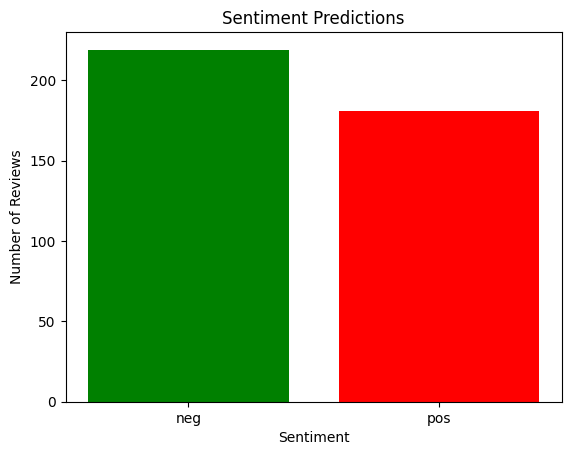

In [ ]:
# Step 1: Import libraries
import nltk
import random
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from nltk import FreqDist, classify, NaiveBayesClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 2: Download required NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')
# Step 3: Load movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Step 4: Shuffle the data
random.shuffle(documents)

# Step 5: Preprocessing & Feature Extraction
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]  # Top 2000 frequent words as features

def document_features(doc):
    words = set(doc)
    features = {}
    for w in word_features:
        features[f'contains({w})'] = (w in words)
    return features

# Step 6: Create feature sets
feature_sets = [(document_features(d), c) for (d, c) in documents]

# Step 7: Split into training and test sets (80-20 split)
train_size = int(len(feature_sets) * 0.8)
train_set, test_set = feature_sets[:train_size], feature_sets[train_size:]

# Step 8: Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Step 9: Evaluate the classifier
print("Model Accuracy:", classify.accuracy(classifier, test_set))

# Display most informative features
classifier.show_most_informative_features(10)

# Step 10: Get actual vs predicted for evaluation
actual = []
predicted = []

for features, label in test_set:
    actual.append(label)
    predicted.append(classifier.classify(features))

# Step 11: Confusion matrix and classification report
cm = confusion_matrix(actual, predicted, labels=['pos', 'neg'])
print("\nClassification Report:\n", classification_report(actual, predicted))

# Step 12: Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['pos', 'neg'], yticklabels=['pos', 'neg'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 13: Bar chart of sentiment prediction counts
labels, counts = np.unique(predicted, return_counts=True)
plt.bar(labels, counts, color=['green', 'red'])
plt.title("Sentiment Predictions")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



✅ Model Accuracy: 0.7825
Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.0 : 1.0
         contains(damon) = True              pos : neg    =      9.5 : 1.0
        contains(seagal) = True              neg : pos    =      8.9 : 1.0
          contains(lame) = True              neg : pos    =      6.2 : 1.0
   contains(wonderfully) = True              pos : neg    =      5.9 : 1.0
         contains(damme) = True              neg : pos    =      5.7 : 1.0
         contains(flynt) = True              pos : neg    =      5.1 : 1.0
        contains(poorly) = True              neg : pos    =      5.0 : 1.0
          contains(mess) = True              neg : pos    =      5.0 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.0 : 1.0

🔍 Sample Test Review Analysis:

Review 1:
🔹 Text: a wonderful little movie that is really interested in its characters and in its theme . the scene of " second best " is laid in wales . james ( chr

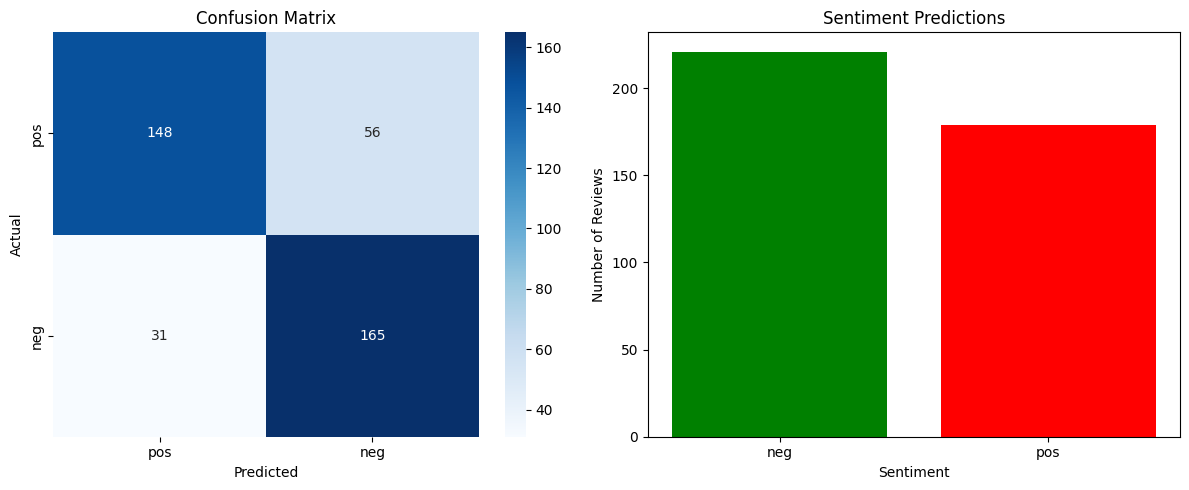

In [ ]:
# Step 1: Import libraries
import nltk
import random
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 2: Download required NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')

# Step 3: Load movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Step 4: Shuffle the data
random.shuffle(documents)

# Step 5: Preprocessing & Feature Extraction
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]  # Top 2000 frequent words as features

def document_features(doc):
    words = set(doc)
    features = {}
    for w in word_features:
        features[f'contains({w})'] = (w in words)
    return features

# Step 6: Create feature sets
feature_sets = [(document_features(d), c) for (d, c) in documents]

# Step 7: Split into training and test sets (80-20 split)
train_size = int(len(feature_sets) * 0.8)
train_set, test_set = feature_sets[:train_size], feature_sets[train_size:]
test_docs = documents[train_size:]  # Keep raw test texts for printing

# Step 8: Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Step 9: Evaluate the classifier
print("\n✅ Model Accuracy:", accuracy(classifier, test_set))

# Display most informative features
classifier.show_most_informative_features(10)

# Step 10: Classify test data and print review with results
print("\n🔍 Sample Test Review Analysis:")
actual = []
predicted = []

for i, ((features, label), (text_words, _)) in enumerate(zip(test_set, test_docs)):
    prediction = classifier.classify(features)
    actual.append(label)
    predicted.append(prediction)

    review_text = ' '.join(text_words[:50]) + '...'
    print(f"\nReview {i+1}:")
    print(f"🔹 Text: {review_text}")
    print(f"✅ Actual: {label} | 🤖 Predicted: {prediction}")

# Step 11: Confusion matrix and classification report
cm = confusion_matrix(actual, predicted, labels=['pos', 'neg'])
print("\n📄 Classification Report:\n", classification_report(actual, predicted))

# Step 12: Plot confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['pos', 'neg'], yticklabels=['pos', 'neg'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Step 13: Bar chart of sentiment prediction counts
plt.subplot(1, 2, 2)
labels_, counts = np.unique(predicted, return_counts=True)
plt.bar(labels_, counts, color=['green', 'red'])
plt.title("Sentiment Predictions")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

plt.tight_layout()
plt.show()
